# Simple Linear Regression 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import r2_score;
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

### Load Data

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.01 Simple linear regression.csv')
# Let's check what's inside this data frame
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


## Descriptive Statistics

In [3]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Create Your First Regression

### Declare the Dependent and Independent Variables

In [4]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['SAT']

## Explore the Data

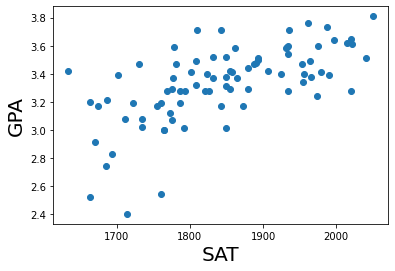

In [5]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1,y)
# Name the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
# Show the plot
plt.show()

## Design a regression model

In [6]:
# y=b0+b1x1

x=sm.add_constant(x1)

results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           7.20e-11
Time:                        19:47:01   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot Linear Regression

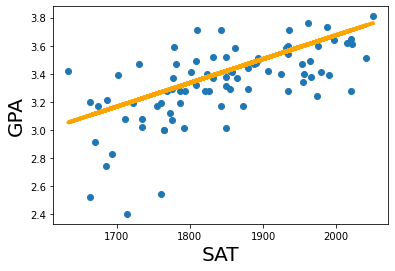

In [7]:
#Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.2750+0.0017*x1
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

## Splitting the data into training data and test data set

In [8]:
train_data, test_data= train_test_split(data,test_size=0.1,random_state=1);
train_data_X = np.asanyarray(train_data[['SAT']]);
train_data_Y = np.asanyarray(train_data[['GPA']]);
test_data_X = np.asanyarray(test_data[['SAT']]);
test_data_Y = np.asanyarray(test_data[['GPA']]);

## Creating the Model

In [9]:
lin_reg= linear_model.LinearRegression();
lin_reg.fit(train_data_X, train_data_Y);
reg_coefficient = lin_reg.coef_[0][0];
reg_intercept= lin_reg.intercept_[0];
test_data_Y_hat = lin_reg.predict(test_data_X);
print ("Coefficient ",reg_coefficient);
print ("Intercept ",reg_intercept);

Coefficient  0.0016169094932040877
Intercept  0.34546795119587026


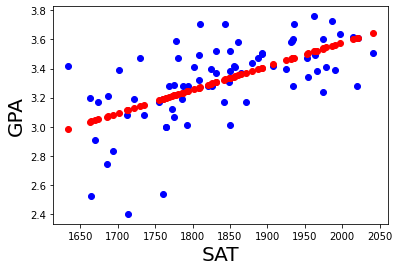

In [10]:
plt.scatter(train_data['SAT'],train_data['GPA'],color='blue');
plt.scatter(train_data['SAT'],train_data['SAT'] * reg_coefficient 
+ reg_intercept,color='red');
plt.xlabel('SAT', fontsize = 20);
plt.ylabel('GPA', fontsize = 20);
plt.show();

## Model Evaluation

In [11]:
MAE=np.mean(np.absolute(test_data_Y_hat - test_data_Y));
MSE=np.mean((test_data_Y_hat - test_data_Y) ** 2);
r2score = r2_score(test_data_Y_hat,test_data_Y);
print("Mean Absolute Error: %0.2f"% MAE );
print("Mean Squared Error (MSE): %0.2f"% MSE );
print ("R2 Score: %0.2f"% r2score);

Mean Absolute Error: 0.10
Mean Squared Error (MSE): 0.01
R2 Score: 0.56
